In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('Join_TMDB_Filtered.csv')

In [9]:
movies = movies.fillna(0)

In [10]:
tmovies = pd.read_csv('tmovies.csv')

In [11]:
tmovies = tmovies.fillna(0)

In [12]:
movies = pd.merge(movies, tmovies, how='left', left_on='tmdbId', right_on='id',  suffixes=('', '_t'))

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
movies['pl'] = movies['revenue'] - movies['budget']

In [15]:
movies.columns

Index(['movieId', 'title', 'genres', 'release_year', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War',
       'Musical', 'Western', 'Film-Noir', '(no genres listed)',
       'movielens_number_reviews', 'movielens_avg_rating', 'imdbId', 'tmdbId',
       'tmdb_info', 'tmdb_cast', 'Unnamed: 0', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres_t', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_t', 'video',
       'vote_average', 'vote_count', 'Unnamed: 0_t', 'adult_t',
       'backdrop_path_t', 'belongs_to_collection_t', 'budget_t', 'genres_t',
       'homepage_t', 'id_t', 'imdb_id_t', 'original_language_t',
  

In [16]:
movies_2 = movies.copy()

In [17]:
movies_2['rev_mn'] = movies_2.apply(lambda row: (row['revenue']/1000000), axis=1)
movies_2['budg_mn'] = movies_2.apply(lambda row: (row['budget']/1000000), axis=1)
movies_2['pl_mn'] = movies_2.apply(lambda row: (row['pl']/1000000), axis=1)

In [18]:
movies_2.describe()

,movieId,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,Unnamed: 0_t,budget_t,id_t,popularity_t,revenue_t,runtime_t,vote_average_t,vote_count_t,pl,rev_mn,budg_mn,pl_mn
count,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.00000,6815.000000,6815.000000,6815.000000,6815.00000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6.815000e+03,6815.000000,6815.0,6.815000e+03,6815.000000,6815.000000,6.815000e+03,6815.000000,6815.000000,6815.000000,5861.0,5.861000e+03,5861.000000,5861.000000,5.861000e+03,5861.000000,5861.000000,5861.000000,6.815000e+03,6815.000000,6815.000000,6815.000000
mean,98503.718415,2010.952751,0.073074,0.049010,0.036977,0.284226,0.050330,0.119296,0.44901,0.134556,0.092003,0.181511,0.10066,0.051064,0.065444,0.020396,0.166104,0.027146,0.022010,0.006456,0.002348,0.007483,145.460895,3.062103,1.710419e+06,105186.678650,0.0,8.174600e+06,100548.373734,3.922059,2.230170e+07,82.228760,5.168393,325.806897,0.0,9.505187e+06,116914.718819,4.560456,2.593176e+07,95.613206,6.009657,378.838765,1.412710e+07,22.301696,8.174600,14.127096
std,18187.967729,2.001349,0.260277,0.215904,0.188720,0.451078,0.218641,0.324160,0.49743,0.341274,0.289051,0.385470,0.30090,0.220144,0.247326,0.141362,0.372201,0.162521,0.146728,0.080097,0.048400,0.086189,641.783190,0.826761,7.017532e+05,84062.035537,0.0,2.681567e+07,86746.676448,5.113002,1.004149e+08,42.401145,2.443377,1081.874864,0.0,2.869662e+07,82681.619108,5.242797,1.078449e+08,28.470996,1.373114,1157.975583,8.016898e+07,100.414910,26.815673,80.168980
min,53207.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.004650e+05,155.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,189.000000,0.003000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,0.000000,0.000000,-165.710090
25%,85710.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.750000,1.221014e+06,38905.000000,0.0,0.000000e+00,34824.000000,0.465500,0.000000e+00,80.000000,4.900000,4.000000,0.0,0.000000e+00,49594.000000,1.094000,0.000000e+00,87.000000,5.500000,11.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,100253.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.230769,1.590950e+06,78400.000000,0.0,0.000000e+00,76494.000000,2.328000,0.000000e+00,93.000000,6.000000,26.000000,0.0,0.000000e+00,86726.000000,3.193000,0.000000e+00,95.000000,6.200000,40.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,112179.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,3.555556,2.094905e+06,159013.000000,0.0,1.100000e+06,158053.000000,6.230000,1.295000e+02,105.000000,6.700000,131.000000,0.0,3.500000e+06,174325.000000,6.766000,2.069090e+05,106.000000,6.800000,186.000000,0.000000e+00,0.000130,1.100000,0.000000
max,131262.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20438.000000,5.000000,4.530184e+06,420743.000000,0.0,3.800000e+08,4207

In [21]:
movies_3 = movies_2[movies_2['movielens_number_reviews'] > 4000]

In [22]:
#exclude movies with 0 budgets
movies_1 = movies[movies['budget'] > 0]

In [23]:
movies_1['rev_mn'] = movies_1.apply(lambda row: (row['revenue']/1000000), axis=1)
movies_1['budg_mn'] = movies_1.apply(lambda row: (row['budget']/1000000), axis=1)
movies_1['pl_mn'] = movies_1.apply(lambda row: (row['pl']/1000000), axis=1)

/Users/proghani1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/proghani1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/proghani1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [24]:
movies_1.describe()

,movieId,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,Unnamed: 0_t,budget_t,id_t,popularity_t,revenue_t,runtime_t,vote_average_t,vote_count_t,pl,rev_mn,budg_mn,pl_mn
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.0,1.979000e+03,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.0,1.979000e+03,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000
mean,96562.458312,2011.447701,0.123295,0.058615,0.053562,0.320364,0.075291,0.134411,0.465892,0.238504,0.133906,0.262254,0.125316,0.062658,0.106620,0.060637,0.036887,0.031834,0.026781,0.009601,0.003032,0.001011,329.251137,3.084542,1.612064e+06,98066.335018,0.0,2.815053e+07,98066.335018,7.904440,7.515784e+07,103.927741,6.070844,992.263770,0.0,2.815053e+07,98066.335018,7.904440,7.515784e+07,103.927741,6.070844,992.263770,4.700731e+07,75.157835,28.150530,47.007305
std,16022.173258,1.743881,0.328858,0.234963,0.225209,0.466734,0.263926,0.341180,0.498961,0.426277,0.340637,0.439971,0.331160,0.242408,0.308707,0.238723,0.188533,0.175603,0.161484,0.097537,0.054992,0.031782,872.425094,0.670101,6.220478e+05,76548.150431,0.0,4.375543e+07,76548.150431,7.104139,1.752622e+08,21.970804,1.053054,1834.696645,0.0,4.375543e+07,76548.150431,7.104139,1.752622e+08,21.970804,1.053054,1834.696645,1.433065e+08,175.262250,43.755435,143.306531
min,60684.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.495160e+05,189.000000,0.0,1.000000e+00,189.000000,0.007000,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.000000e+00,189.000000,0.007000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,0.000000,0.000001,-165.710090
25%,84404.500000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.802474,1.200330e+06,41210.500000,0.0,3.500000e+06,41210.500000,4.139000,0.000000e+00,92.000000,5.500000,52.000000,0.0,3.500000e+06,41210.500000,4.139000,0.000000e+00,92.000000,5.500000,52.000000,-5.000000e+06,0.000000,3.500000,-5.000000
50%,96567.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,3.180000,1.532958e+06,72525.000000,0.0,1.050000e+07,72525.000000,7.052000,5.496951e+06,101.000000,6.100000,286.000000,0.0,1.050000e+07,72525.000000,7.052000,5.496951e+06,101.000000,6.100000,286.000000,-3.000000e+05,5.496951,10.500000,-0.300000
75%,108747.500000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,279.000000,3.514634,1.934218e+06,139831.500000,0.0,3.158260e+07,139831.500000,9.724000,6.754255e+07,113.000000,6.800000,1025.000000,0.0,3.158260e+07,139831.500000,9.724000,6.754255e+07,113.000000,6.800000,1025.000000,3.736857e+07,67.542552,31.582600,37.368566
max,131237.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14023.000000,5.000000,4.397346e+06,

/Users/proghani1/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


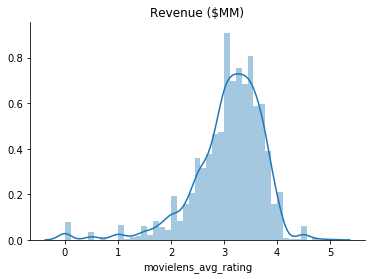

In [85]:
sns.distplot(movies_1['movielens_avg_rating']).set_title('Revenue ($MM)')
sns.despine()

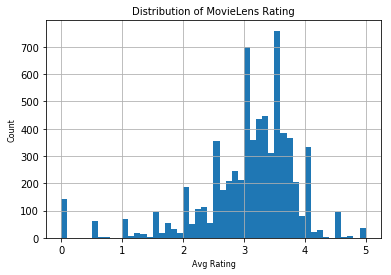

In [88]:
n, bins, patches = plt.hist(movies['movielens_avg_rating'],bins = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])
plt.xlabel('Avg Rating',fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.title('Distribution of MovieLens Rating',fontsize=10)
plt.grid(True)
# plt.show()
plt.savefig('Distribution of MovieLens Rating.png', dpi=600)

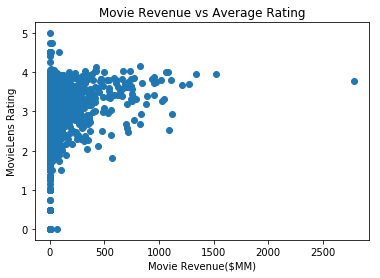

In [89]:
ax = plt.scatter(movies_1.rev_mn, movies_1.movielens_avg_rating)
plt.xlabel("Movie Revenue($MM)")
plt.ylabel("MovieLens Rating")
plt.title('Movie Revenue vs Average Rating')
# plt.show()
plt.savefig('rating_vs_revenue.png', dpi=600)

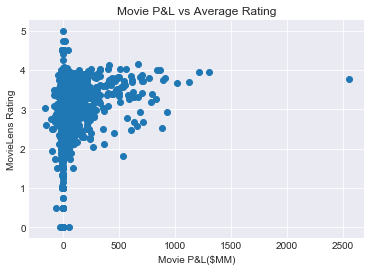

In [358]:
#include
ax = plt.scatter(movies_1.pl_mn, movies_1.movielens_avg_rating)
plt.xlabel("Movie P&L($MM)")
plt.ylabel("MovieLens Rating")
plt.title('Movie P&L vs Average Rating')
# plt.show()
plt.savefig('rating_vs_P&L.png', dpi=600)

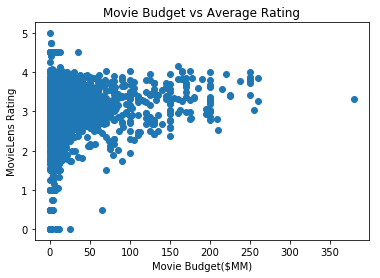

In [81]:
#include
ax = plt.scatter(movies_1.budg_mn, movies_1.movielens_avg_rating)
plt.xlabel("Movie Budget($MM)")
plt.ylabel("MovieLens Rating")
plt.title('Movie Budget vs Average Rating')
# plt.show()
plt.savefig('rating_vs_budget.png', dpi=600)

In [349]:
np.corrcoef(movies_1.budg_mn, movies_1.movielens_avg_rating)

array([[1.        , 0.10609676],
       [0.10609676, 1.        ]])

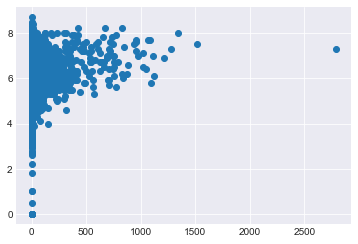

In [340]:
plt.scatter(movies_1.rev_mn, movies_1.vote_average)

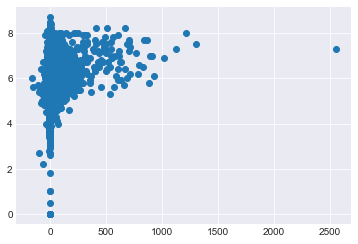

In [341]:
plt.scatter(movies_1.pl_mn, movies_1.vote_average)

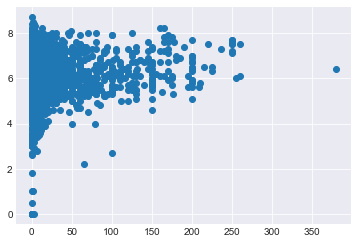

In [342]:
plt.scatter(movies_1.budg_mn, movies_1.vote_average)


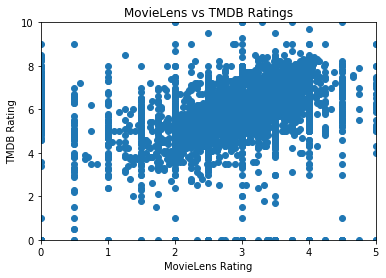

In [46]:
#include
ax = plt.scatter(movies.movielens_avg_rating, movies.vote_average)
plt.xlabel("MovieLens Rating")
plt.ylabel("TMDB Rating")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=0,xmax=5)
plt.title('MovieLens vs TMDB Ratings')
# plt.show()
plt.savefig('movielens_vs_tmdb.png', dpi=600)

In [47]:
np.corrcoef(movies_1.movielens_avg_rating, movies_1.vote_average)

array([[1.        , 0.56400268],
       [0.56400268, 1.        ]])

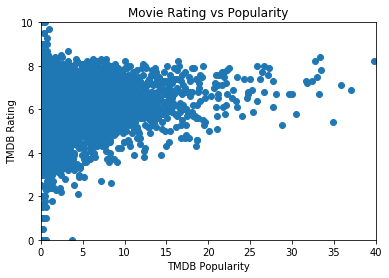

In [80]:
#include
ax = plt.scatter(movies.popularity, movies.vote_average)
plt.xlabel("TMDB Popularity")
plt.ylabel("TMDB Rating")
plt.ylim(ymin=0,ymax=10)
plt.xlim(xmin=0,xmax=40)
plt.title('Movie Rating vs Popularity')
# plt.show()
plt.savefig('rating_vs_popularity.png', dpi=600)


In [51]:
np.corrcoef(movies_1.popularity, movies_1.vote_average)

array([[1.        , 0.24920961],
       [0.24920961, 1.        ]])

In [335]:
movie_genre_analysis=movies.iloc[:,4:24].copy()
movie_genre_analysis.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


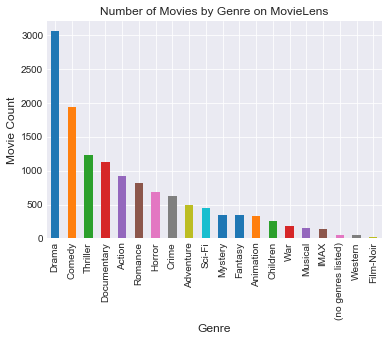

In [355]:
s_sort = movie_genre_analysis.sum().sort_values(ascending=False)
ax = s_sort.plot.bar(x='Genre', rot=90)
ax.set_xlabel("Genre", fontsize=12)
ax.set_ylabel("Movie Count", fontsize=12)
plt.title('Number of Movies by Genre on MovieLens')
#plt.show()
plt.figure(figsize = (20, 10))
plt.savefig('movies_by_genre.png', dpi=600)

In [95]:
genre_vote_temp= movies.iloc[:,4:26].copy()
genre_vote_analysis = genre_vote_analysis.drop(columns='movielens_number_reviews')
genre_vote_analysis.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),movielens_avg_rating
0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2.935510
1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2.923729
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.230642
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.170066
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.062241


In [170]:
genre_vote_analysis.columns

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir',
       '(no genres listed)', 'movielens_avg_rating'],
      dtype='object')

In [132]:
len(genre_vote_analysis)

6815

In [146]:
genre_vote_analysis = genre_vote_analysis.fillna(0)

In [151]:
Adventure_vote = 0
Animation_vote = 0
Children_vote = 0
Comedy_vote = 0
Fantasy_vote = 0
Romance_vote = 0
Drama_vote = 0
Action_vote = 0
Crime_vote = 0
Thriller_vote = 0
Horror_vote = 0
Mystery_vote = 0
SciFi_vote = 0
IMAX_vote = 0
Documentary_vote = 0
War_vote = 0
Musical_vote = 0
Western_vote = 0
FilmNoir_vote = 0
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
k=0
l=0
m=0
n=0
o=0
p=0
q=0
r=0
s=0
t=0
u=0

for i in range(len(genre_vote_analysis)):
    if genre_vote_analysis.iloc[i]['Adventure'] == 1:
        Adventure_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        a += 1
    if genre_vote_analysis.iloc[i]['Animation'] == 1:
        Animation_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        b += 1
    if genre_vote_analysis.iloc[i]['Children'] == 1:
        Children_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        c += 1
    if genre_vote_analysis.iloc[i]['Comedy'] == 1:
        Comedy_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        d += 1
    if genre_vote_analysis.iloc[i]['Fantasy'] == 1:
        Fantasy_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        e += 1
    if genre_vote_analysis.iloc[i]['Romance'] == 1:
        Romance_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        f += 1
    if genre_vote_analysis.iloc[i]['Drama'] == 1:
        Drama_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        g += 1
    if genre_vote_analysis.iloc[i]['Action'] == 1:
        Action_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        h += 1
    if genre_vote_analysis.iloc[i]['Crime'] == 1:
        Crime_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        k += 1
    if genre_vote_analysis.iloc[i]['Thriller'] == 1:
        Thriller_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        l += 1
    if genre_vote_analysis.iloc[i]['Horror'] == 1:
        Horror_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        m += 1
    if genre_vote_analysis.iloc[i]['Mystery'] == 1:
        Mystery_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        n += 1
    if genre_vote_analysis.iloc[i]['Sci-Fi'] == 1:
        SciFi_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        o += 1
    if genre_vote_analysis.iloc[i]['IMAX'] == 1:
        IMAX_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        p += 1
    if genre_vote_analysis.iloc[i]['Documentary'] == 1:
        Documentary_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        q += 1
    if genre_vote_analysis.iloc[i]['War'] == 1:
        War_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        r += 1
    if genre_vote_analysis.iloc[i]['Musical'] == 1:
        Musical_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        s += 1
    if genre_vote_analysis.iloc[i]['Western'] == 1:
        Western_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        t += 1
    if genre_vote_analysis.iloc[i]['Film-Noir'] == 1:
        FilmNoir_vote += genre_vote_analysis.iloc[i]['movielens_avg_rating']
        u += 1

In [161]:
genre_vote_lst = [Adventure_vote,Animation_vote,Children_vote,Comedy_vote,Fantasy_vote,Romance_vote,Drama_vote,
                  Action_vote,Crime_vote,Thriller_vote,Horror_vote,Mystery_vote,SciFi_vote,IMAX_vote,
                  Documentary_vote,War_vote,Musical_vote,Western_vote,FilmNoir_vote]
alph_lst = [a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u]

In [168]:
vote_by_gen = []
for i in range(len(genre_vote_lst)):
    x = 0
    x = (genre_vote_lst[i]/alph_lst[i])
    y ='{:0.2f}'.format(x)
    vote_by_gen.append(y)
    

In [169]:
vote_by_gen

['3.00',
 '3.13',
 '2.84',
 '3.00',
 '3.06',
 '3.11',
 '3.18',
 '2.93',
 '3.07',
 '2.89',
 '2.60',
 '3.00',
 '2.91',
 '3.29',
 '3.28',
 '3.20',
 '3.04',
 '2.93',
 '3.23']

In [171]:
genre_lst =['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']

In [242]:
genre_df = pd.DataFrame({'Genre':genre_lst,'Avg Vote':vote_by_gen}).sort_values(by = 'Avg Vote')
genre_df

,Genre,Avg Vote
10,Horror,2.60
2,Children,2.84
9,Thriller,2.89
12,Sci-Fi,2.91
17,Western,2.93
7,Action,2.93
11,Mystery,3.00
0,Adventure,3.00
3,Comedy,3.00
16,Musical,3.04


In [253]:
genre_df['Avg Vote'] = genre_df['Avg Vote'].astype(float)

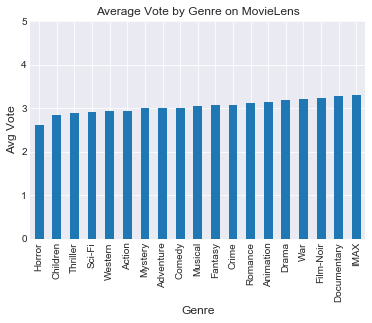

In [354]:
sns.set_style("darkgrid")
ax = genre_df.plot.bar(x='Genre', rot=90)
ax.legend_.remove()
ax.set_xlabel("Genre", fontsize=12)
ax.set_ylabel("Avg Vote", fontsize=12)
ax.set_ylim(ymin=0,ymax=5)
plt.title('Average Vote by Genre on MovieLens')
#plt.show()
plt.savefig('vote_by_genre.png', dpi=600)